# Практика: Модели регрессии

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
type(california)

sklearn.utils.Bunch

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [ ]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
y = data['Price']
X = data.drop('Price', axis=1)

In [ ]:
y.shape, X.shape

((20640,), (20640, 8))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [ ]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.43669329313432453
HouseAge 0.009435778033238126
AveRooms -0.10732204139090495
AveBedrms 0.645065693519814
Population -3.9763894212480055e-06
AveOccup -0.0037865426549709715
Latitude -0.42131437752714274
Longitude -0.4345137546747771


In [ ]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718437


In [ ]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


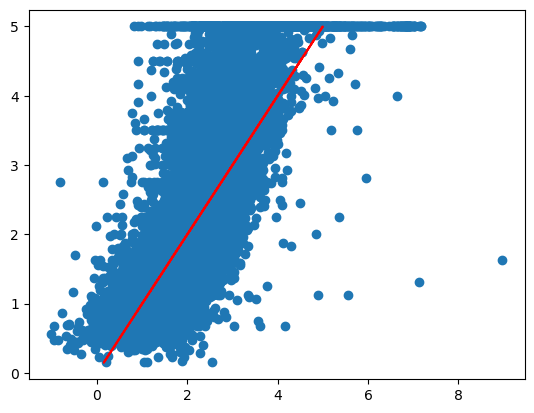

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r');

In [ ]:
model.score(X, y)

0.606232685199805

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)

In [ ]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

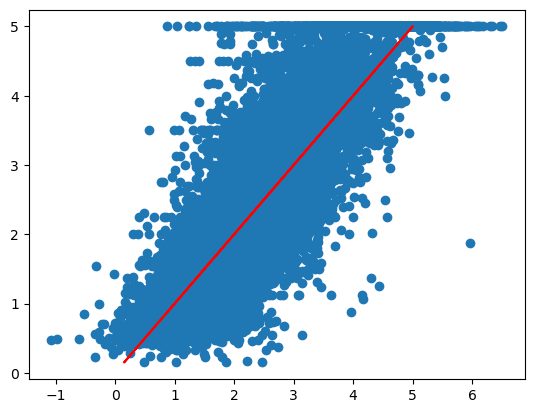

In [ ]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r');

In [ ]:
polynomial.score(poly, y)

0.7453925827821658

### 1. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
print('Средняя квадратичная ошибка: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

Средняя квадратичная ошибка:  0.5243209861846072
RMSE:  0.7241001216576387


In [ ]:
model_2 = LinearRegression(fit_intercept=False)
#без использования свободного коэффициента, если хотим чтобы проходила через начало координат
model_2.fit(X, y)
y_pred_2 = model_2.predict(X)
model_2.score(X, y)

0.5462360656980104

In [ ]:
model_3 = LinearRegression(n_jobs=2)
#n_jobs - число потоков для параллельного вычисления
model_3.fit(X, y)
y_pred_3 = model_3.predict(X)
model_3.score(X, y)

0.606232685199805

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
#alpha - коэффициент регуляризации, чем больше - тем сильнее ограничения весов
lasso.fit(X, y)
lasso_score = lasso.score(X, y)
print(lasso_score)

0.5452665703368436


In [ ]:
lasso2 = Lasso(alpha=0.9)
lasso2.fit(X, y)
lasso2_score = lasso2.score(X, y)
print(lasso2_score)

0.327960492978125


In [ ]:
lasso2 = Lasso(alpha=0.01)
lasso2.fit(X, y)
lasso2_score = lasso2.score(X, y)
print(lasso2_score)

0.6024178576491683


### 2. Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=42)

Метод опорных векторов без ядра

In [ ]:
from sklearn.svm import SVR

# Создаем модель SVM
model_4 = SVR(kernel='linear', max_iter=1000)

# Обучаем модель на тренировочных данных
model_4.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred_4 = model_4.predict(X_test)

print(model_4.score(X_test, y_test))

-3.237180560638156


C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


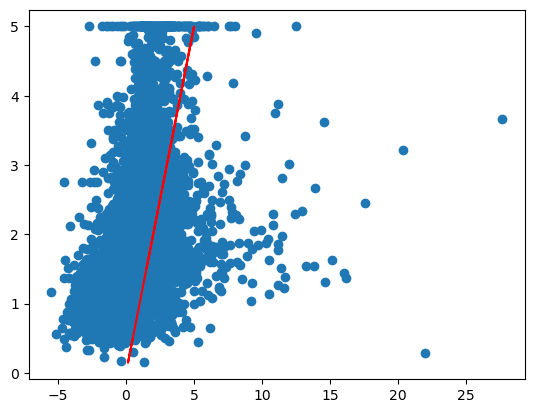

In [ ]:
plt.scatter(y_pred_4, y_test)
plt.plot(y_test, y_test, c='r');

Метод опорных векторов с гауссовым ядром

In [ ]:
from sklearn.svm import SVR
model_5 = SVR(kernel='rbf', max_iter=1000)
model_5.fit(X_train, y_train)
y_pred_5 = model_5.predict(X_test)
print(model_5.score(X_test, y_test))

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-0.065453573253073


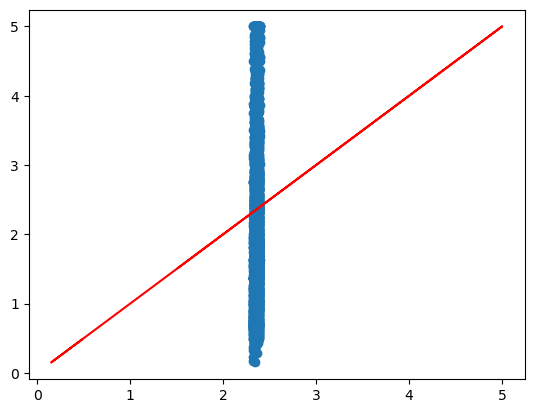

In [ ]:
plt.scatter(y_pred_5, y_test)
plt.plot(y_test, y_test, c='r');

Метод опорных векторов с полиномиальным ядром

In [ ]:
from sklearn.svm import SVR
model_6 = SVR(kernel='poly', degree=3, gamma='auto', max_iter=1000)
#gamma - ширина функции ядра, определяется автоматически
#degree - степень полиномиальной функции
model_6.fit(X_train, y_train)
y_pred_6 = model_6.predict(X_test)
print(model_6.score(X_test, y_test))

-13405907.295890545


C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


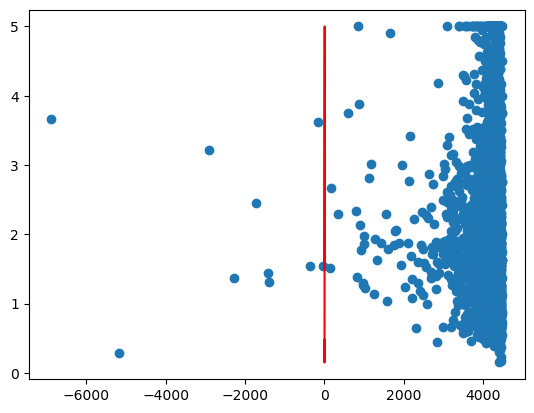

In [ ]:
plt.scatter(y_pred_6, y_test)
plt.plot(y_test, y_test, c='r');

Метод ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_7 = KNeighborsRegressor(n_neighbors=5)
#n-neighbors - количество соседей, которых необходимо использовать для прогноза
model_7.fit(X_train, y_train)
y_pred_7 = model_7.predict(X_test)
print(model_7.score(X_test, y_test))

0.14631049965900345


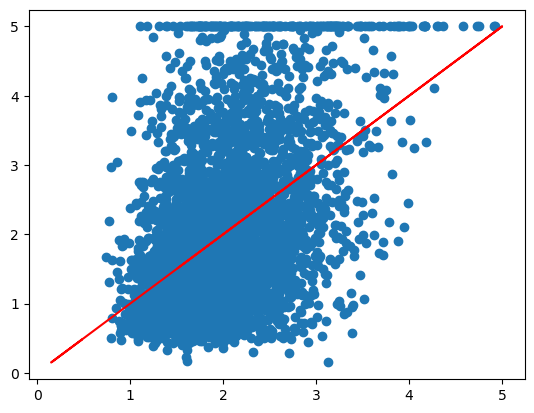

In [ ]:
plt.scatter(y_pred_7, y_test)
plt.plot(y_test, y_test, c='r');

Многослойный перцептрон

In [ ]:
from sklearn.neural_network import MLPRegressor
model_8 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
#hidden_layer_sizes - количестао нейронов в каждом слое
#activation - функция активации, relu возвращает значение, если оно больше 0, иначе 0
model_8.fit(X_train, y_train)
y_pred_8 = model_8.predict(X_test)
print(model_8.score(X_test, y_test))

-0.1574216465403624


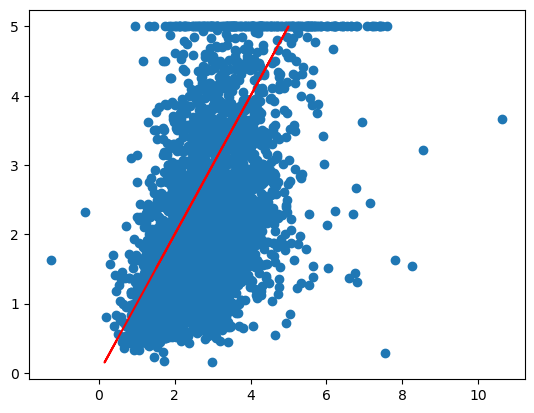

In [ ]:
plt.scatter(y_pred_8, y_test)
plt.plot(y_test, y_test, c='r');

Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_9 = DecisionTreeRegressor(max_depth=12)
model_9.fit(X_train, y_train)
y_pred_9 = model_9.predict(X_test)
print(model_9.score(X_test, y_test))

0.6679006864196806


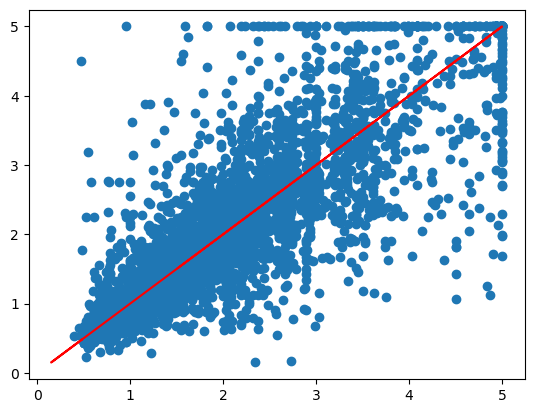

In [ ]:
plt.scatter(y_pred_9, y_test)
plt.plot(y_test, y_test, c='r');

### 3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.


In [ ]:
def train_run_models(X_train, y_train, X_test, y_test):
    models = [
        ('Линейная регрессия', LinearRegression()),
        ('Метод опорных векторов с линейным ядром', SVR(kernel='linear')),
        ('Метод опорных векторов c гаусовским ядром', SVR(kernel='rbf')),
        ('Метод опорных векторов полиномиальным ядром', SVR(kernel='poly')),
        ('Метод ближайших соседей', KNeighborsRegressor()),
        ('Многослойный перцептрон', MLPRegressor()),
        ('Дерево решений', DecisionTreeRegressor())
    ]

    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'{name}: {model.score(X_test, y_test)}')

In [ ]:
train_run_models(X_train, y_train, X_test, y_test)

Линейная регрессия: 0.4526066021617383
Метод опорных векторов с линейным ядром: 0.02034000915866252
Метод опорных векторов c гаусовским ядром: 0.1821145664971341
Метод опорных векторов полиномиальным ядром: 0.2821978487423774
Метод ближайших соседей: 0.43016439526042805
Многослойный перцептрон: -2.9683537968187395
Дерево решений: -0.005324083451006212


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 4. Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.


In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)
train_run_models(X_train, y_train, X_test, y_test)

Линейная регрессия: 0.4526066021617383
Метод опорных векторов с линейным ядром: 0.02034000915866252
Метод опорных векторов c гаусовским ядром: 0.1821145664971341
Метод опорных векторов полиномиальным ядром: 0.2821978487423774
Метод ближайших соседей: 0.43016439526042805
Многослойный перцептрон: -2.978285175114002
Дерево решений: 0.02475636612491916


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
